In [57]:
from langgraph.graph import StateGraph, START,END
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from typing import TypedDict


In [58]:

load_dotenv()


#load_dotenv(r"C:\Users\Chaudhary Computers\Desktop\Langgraph\.env")
print(os.getenv("Google_API_key")[:7])  # confirm only first chars

sk-proj


In [68]:
# Make sure the environment variable is loaded before creating the model
# (This cell should be run after load_dotenv)
api_key = os.getenv("OPENAI_API_KEY")
if not api_key:
	raise ValueError("OPENAI_API_KEY not found in environment variables. Please set it in your .env file.")
model = ChatOpenAI(model="gpt-4o-mini", api_key=api_key)

In [69]:
#create a state 
class LLMState(TypedDict):
    question: str
    answer: str

In [70]:
def llm_qa(state:LLMState)->LLMState:


    #extract the question from the state 
    question = state['question']
    
    #from a prompt
    prompt = f'Answer the following question {question}'
    #ask the question to the LLM 
    answer = model.invoke(prompt).content

    #update the answer in the state 
    
    state['answer'] = answer
    return state

In [71]:
#crate a graph
graph = StateGraph(LLMState)

#add a node to the graph
graph.add_node('llm_qa',llm_qa)
#add a edge to the graph

graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa',END)
#compile the graph
workflow = graph.compile()

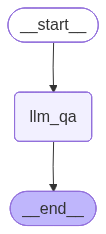

In [72]:
from IPython .display import Image
Image(workflow.get_graph().draw_mermaid_png())


In [73]:
#execute 
initial_state = {'question':'How far is the moon from earth?'}
final_state =  workflow.invoke(initial_state)

print(final_state['answer'])

The average distance from the Earth to the Moon is about 238,855 miles (384,400 kilometers). However, this distance can vary slightly due to the Moon's elliptical orbit.
